Implement native matrix multiplication in native Python

In [27]:
def multi_matrix_native(A, B, C):
    for i in range(len(A)):
        for j in range(len(B[0])):
            s = 0.0
            for k in range(len(B)):
                s += A[i][k] * B[k][j]
            C[i][j] = s
    return C

Implement a dot-product matrix with Numpy

In [28]:
import numpy as np
def multi_matrix_dot(A, B, C):
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    for i in range(rows_A):
        for j in range(cols_B):
            C[i, j] = np.dot(A[i, :], B[:, j])
    return C

Implement a matrix multiplication with Numpy

In [29]:
def multi_matrix_np(A, B, C):
    C = A @ B
    return C

Code to test the different implementations

In [30]:
import random
from array import array

def Initialize_matrix(n, type="numpy"):
    if type == "numpy":
        An = np.random.random_sample((n, n))
        Bn = np.random.random_sample((n, n))
        Cn = np.zeros_like(An)
        return An, Bn, Cn
    elif type == "python":
        Ap = [[random.random() for _ in range(n)] for _ in range(n)]
        Bp = [[random.random() for _ in range(n)] for _ in range(n)]
        Cp = [[0.0 for _ in range(n)] for _ in range(n)]
        return Ap, Bp, Cp
    elif type == "numpy 32":
        An = np.random.random_sample((n, n)).astype(np.float32)
        Bn = np.random.random_sample((n, n)).astype(np.float32)
        Cn = np.zeros_like(An)
        return An, Bn, Cn
    elif type =="python 32":
        Ap = [array('f', (random.random() for _ in range(n))) for _ in range(n)]
        Bp = [array('f', (random.random() for _ in range(n))) for _ in range(n)]
        Cp = [array('f', [0.0]) * n for _ in range(n)]
        return Ap, Bp, Cp

Compare the different implementation

  0%|          | 0/5 [00:00<?, ?it/s]/var/folders/nw/_bz483qd50b_9vt_bcqkwkx00000gn/T/ipykernel_8124/149673539.py:2: RuntimeWarning: divide by zero encountered in matmul
  C = A @ B
/var/folders/nw/_bz483qd50b_9vt_bcqkwkx00000gn/T/ipykernel_8124/149673539.py:2: RuntimeWarning: overflow encountered in matmul
  C = A @ B
/var/folders/nw/_bz483qd50b_9vt_bcqkwkx00000gn/T/ipykernel_8124/149673539.py:2: RuntimeWarning: invalid value encountered in matmul
  C = A @ B
100%|██████████| 5/5 [09:39<00:00, 115.82s/it]


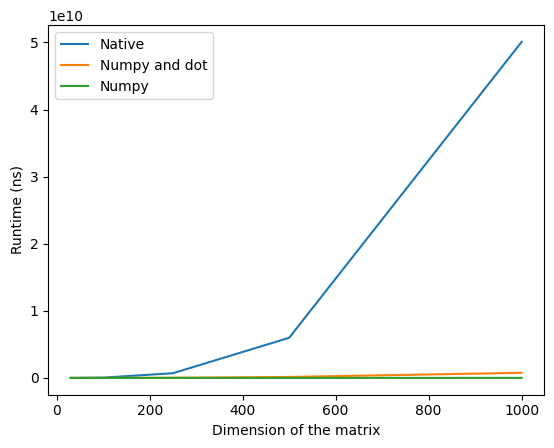

In [31]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time_ns

k = 10
N = [30, 100, 250, 500, 1000]

times_native = np.zeros((len(N), k), dtype=float)
times_dot = np.zeros((len(N), k), dtype=float)
times_np = np.zeros((len(N), k), dtype=float)

for i in tqdm(range(len(N))):
    for j in range(k):
        matrices = Initialize_matrix(N[i], "python")  
        t0 = time_ns()
        multi_matrix_native(*matrices)
        times_native[i, j] = time_ns() - t0
        matrices = Initialize_matrix(N[i], "numpy")
        t0 = time_ns()
        multi_matrix_dot(*matrices)
        times_dot[i, j] = time_ns() - t0
        matrices = Initialize_matrix(N[i], "numpy")
        t0 = time_ns()
        multi_matrix_np(*matrices)
        times_np[i, j] = time_ns() - t0

plt.plot(N, np.mean(times_native, axis=1), label="Native")
plt.plot(N, np.mean(times_dot, axis=1), label="Numpy and dot")
plt.plot(N, np.mean(times_np, axis=1), label="Numpy")
plt.xlabel("Dimension of the matrix")
plt.ylabel("Runtime (ns)")
plt.legend()


Note:
There is an issue with the numpy matmul. See the issue below:

https://stackoverflow.com/questions/79792627/divide-by-zero-encountered-in-matmul-on-macos-m4-with-numpy-v2-0-0

Improve your implementations using Cython

In [32]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [33]:
%%cython
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
def multi_matrix_cython(list A, list B, list C):
    cdef int n = len(A)
    cdef int m = len(A[0])
    cdef int p = len(B[0])
    cdef int i, j, k
    cdef double s

    for i in range(n):
        for j in range(p):
            s = 0.0
            for k in range(m):
                s += A[i][k] * B[k][j]
            C[i][j] = s
    return C


Compare your implementation with/without Cython

100%|██████████| 5/5 [03:44<00:00, 44.86s/it]


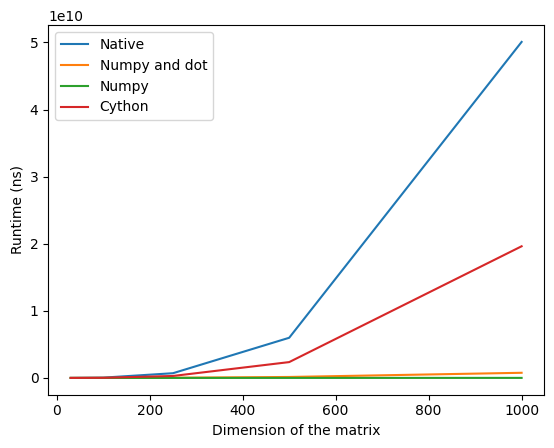

In [34]:
k = 10
N = [30, 100, 250, 500, 1000]

times_cython = np.zeros((len(N), k), dtype=float)

for i in tqdm(range(len(N))):
    for j in range(k):
        matrices = Initialize_matrix(N[i], "python") 
        t0 = time_ns()
        multi_matrix_cython(*matrices)
        times_cython[i, j] = time_ns() - t0

plt.plot(N, np.mean(times_native, axis=1), label="Native")
plt.plot(N, np.mean(times_dot, axis=1), label="Numpy and dot")
plt.plot(N, np.mean(times_np, axis=1), label="Numpy")
plt.plot(N, np.mean(times_cython, axis=1), label="Cython")
plt.xlabel("Dimension of the matrix")
plt.ylabel("Runtime (ns)")
plt.legend()


Improve your implementations using Numba

In [35]:
import numpy as np
from numba import njit, prange

@njit()
def multi_matrix_numba(A, B, C):
    n = A.shape[0]
    m = A.shape[1]
    p = B.shape[1]

    for i in range(n):
        for j in range(p):
            s = 0.0
            for k in range(m):
                s += A[i, k] * B[k, j]
            C[i, j] = s

    return C


@njit(parallel=True)
def multi_matrix_numba_parallel(A, B, C):
    n = A.shape[0]
    m = A.shape[1]
    p = B.shape[1]

    for i in prange(n):
        for j in range(p):
            s = 0.0
            for k in range(m):
                s += A[i, k] * B[k, j]
            C[i, j] = s

    return C

Compare your implementations with/without Numba

100%|██████████| 5/5 [00:08<00:00,  1.64s/it]


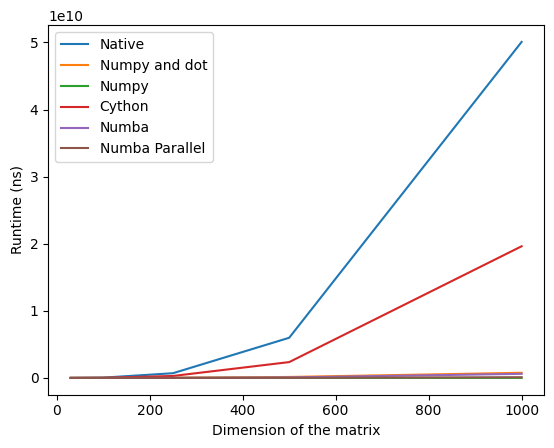

In [36]:
k = 10
N = [30, 100, 250, 500, 1000]

times_numba = np.zeros((len(N), k), dtype=float)
times_numba_parallel = np.zeros((len(N), k), dtype=float)

#For numba compilation
multi_matrix_numba(*Initialize_matrix(5, "numpy"))
multi_matrix_numba_parallel(*Initialize_matrix(5, "numpy"))



for i in tqdm(range(len(N))):
    for j in range(k):
        matrices = Initialize_matrix(N[i], "numpy")   
        t0 = time_ns()
        multi_matrix_numba(*matrices)
        times_numba[i, j] = time_ns() - t0
        matrices = Initialize_matrix(N[i], "numpy")
        t0 = time_ns()
        multi_matrix_numba_parallel(*matrices)
        times_numba_parallel[i, j] = time_ns() - t0


plt.plot(N, np.mean(times_native, axis=1), label="Native")
plt.plot(N, np.mean(times_dot, axis=1), label="Numpy and dot")
plt.plot(N, np.mean(times_np, axis=1), label="Numpy")
plt.plot(N, np.mean(times_cython, axis=1), label="Cython")
plt.plot(N, np.mean(times_numba, axis=1), label="Numba")
plt.plot(N, np.mean(times_numba_parallel, axis=1), label="Numba Parallel")
plt.xlabel("Dimension of the matrix")
plt.ylabel("Runtime (ns)")
plt.legend()

Plot without cython and naive to see the difference

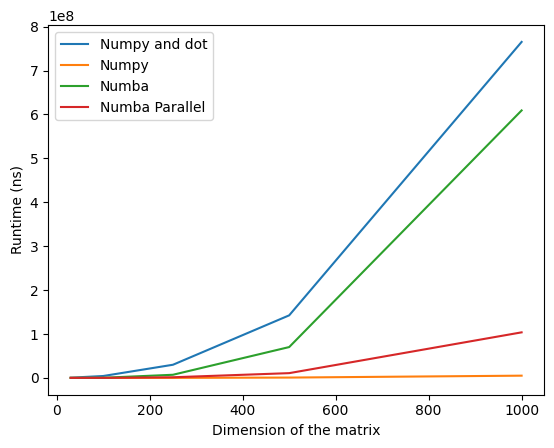

In [37]:
plt.plot(N, np.mean(times_dot, axis=1), label="Numpy and dot")
plt.plot(N, np.mean(times_np, axis=1), label="Numpy")
plt.plot(N, np.mean(times_numba, axis=1), label="Numba")
plt.plot(N, np.mean(times_numba_parallel, axis=1), label="Numba Parallel")
plt.xlabel("Dimension of the matrix")
plt.ylabel("Runtime (ns)")
plt.legend()

Modify your implementation to test with float (32) and double (64) floating point number

100%|██████████| 5/5 [00:08<00:00,  1.60s/it]


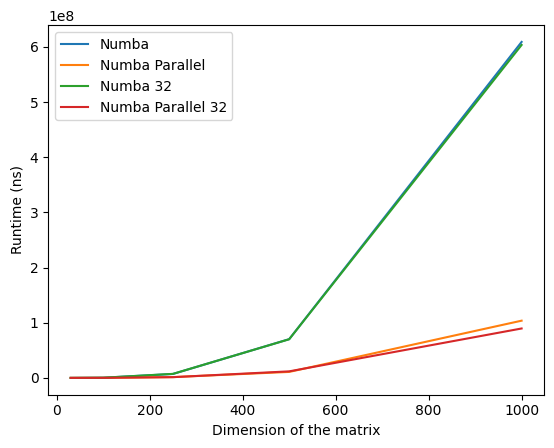

In [38]:
k = 10
N = [30, 100, 250, 500, 1000]

times_numba_32 = np.zeros((len(N), k), dtype=float)
times_numba_parallel_32 = np.zeros((len(N), k), dtype=float)

#For numba compilation
multi_matrix_numba(*Initialize_matrix(5, "numpy"))
multi_matrix_numba_parallel(*Initialize_matrix(5, "numpy"))
multi_matrix_numba(*Initialize_matrix(5, "numpy 32"))
multi_matrix_numba_parallel(*Initialize_matrix(5, "numpy 32"))



for i in tqdm(range(len(N))):
    for j in range(k):
        matrices = Initialize_matrix(N[i], "numpy 32")   
        t0 = time_ns()
        multi_matrix_numba(*matrices)
        times_numba_32[i, j] = time_ns() - t0
        matrices = Initialize_matrix(N[i], "numpy 32")
        t0 = time_ns()
        multi_matrix_numba_parallel(*matrices)
        times_numba_parallel_32[i, j] = time_ns() - t0

plt.plot(N, np.mean(times_numba, axis=1), label="Numba")
plt.plot(N, np.mean(times_numba_parallel, axis=1), label="Numba Parallel")
plt.plot(N, np.mean(times_numba_32, axis=1), label="Numba 32")
plt.plot(N, np.mean(times_numba_parallel_32, axis=1), label="Numba Parallel 32")
plt.xlabel("Dimension of the matrix")
plt.ylabel("Runtime (ns)")
plt.legend()

100%|██████████| 5/5 [10:22<00:00, 124.60s/it]


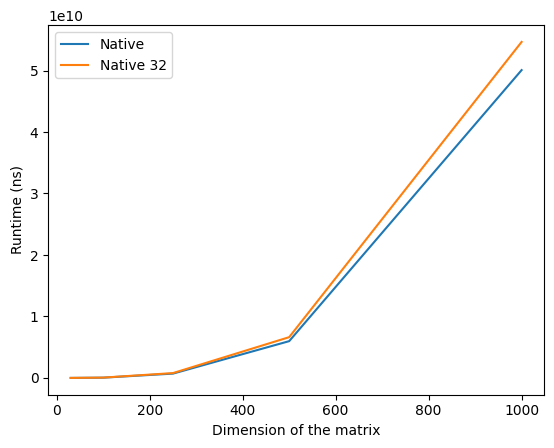

In [39]:
k = 10
N = [30, 100, 250, 500, 1000]

times_python_32 = np.zeros((len(N), k), dtype=float)

for i in tqdm(range(len(N))):
    for j in range(k):
        matrices = Initialize_matrix(N[i], "python 32")   
        t0 = time_ns()
        multi_matrix_native(*matrices)
        times_python_32[i, j] = time_ns() - t0


plt.plot(N, np.mean(times_native, axis=1), label="Native")
plt.plot(N, np.mean(times_python_32, axis=1), label="Native 32")
plt.xlabel("Dimension of the matrix")
plt.ylabel("Runtime (ns)")
plt.legend()